## 5.1T DNN Intro

This uses the TF Low-level API to do a MLP (Multi-Layer Perceptron) with hidden layers. 

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt



In [0]:
from IPython.display import Image
%matplotlib inline


## Training neural networks efficiently with low-level TensorFlow APIs

In [3]:
## Step 1: Load MNIST data



# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

## Create the Network



In [0]:
# These can be changed if we want.


n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)


In [6]:
# These are our variables and placeholders


# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# This is our model definition.

# Note: 2 x Densely Connected Layers + 1 x Output Layer


# Create model
def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model
logits = multilayer_perceptron(X)


## Train the Model

In [0]:

# HyperParameters (Change these if you want)
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1


In [9]:
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
# Initializing the variables
init = tf.global_variables_initializer()

epochs = []
losses = []

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,
                                                            Y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        epochs.append(epoch+1)
        losses.append(avg_cost)
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "loss={:.9f}".format(avg_cost))
    print("Training Finished!")
    # Test mode
    pred = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))

    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    accuracy_out =  accuracy.eval({X: mnist.test.images, Y: mnist.test.labels})



Epoch: 0001 loss=322.019071163
Epoch: 0002 loss=100.079687219
Epoch: 0003 loss=74.709328270
Epoch: 0004 loss=61.119065475
Epoch: 0005 loss=51.264179677
Epoch: 0006 loss=45.485989291
Epoch: 0007 loss=40.232500701
Epoch: 0008 loss=35.704285100
Epoch: 0009 loss=31.948894500
Epoch: 0010 loss=30.297504654
Epoch: 0011 loss=27.712283902
Epoch: 0012 loss=27.050488686
Epoch: 0013 loss=24.743013901
Epoch: 0014 loss=23.298688529
Epoch: 0015 loss=22.005191266
Training Finished!


Text(0.5, 1.0, 'Loss Curve')

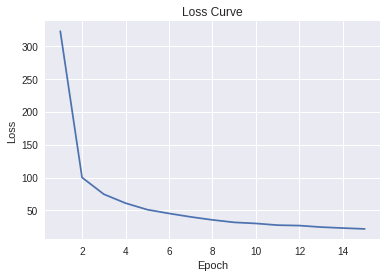

In [10]:
plt.plot(epochs, losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")

In [11]:
## Evaluate the Model

print("Accuracy:", accuracy_out)


Accuracy: 0.8767


## Improvements

Oops! Our accuracy was less than the linear model!  How can that be?

Well, our first attempt might actually be worse.  It's time to make some improvements. This is your turn.

First, we may want to run for more epochs.

We might also want to adjust hyperparameters such as learning rate and batch size.

In [0]:
# HyperParameters (Change these if you want)
learning_rate = 0.00001
training_epochs = 500
batch_size = 20
display_step = 1

In [33]:
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
# Initializing the variables
init = tf.global_variables_initializer()

epochs = []
losses = []

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,
                                                            Y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        epochs.append(epoch+1)
        losses.append(avg_cost)
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "loss={:.9f}".format(avg_cost))
    print("Training Finished!")
    # Test mode
    pred = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))

    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    accuracy_out =  accuracy.eval({X: mnist.test.images, Y: mnist.test.labels})



Epoch: 0001 loss=2339.298805176
Epoch: 0002 loss=1158.877216503
Epoch: 0003 loss=728.185376243
Epoch: 0004 loss=525.636589999
Epoch: 0005 loss=416.564355263
Epoch: 0006 loss=349.789198095
Epoch: 0007 loss=304.905775430
Epoch: 0008 loss=272.430215143
Epoch: 0009 loss=247.859055388
Epoch: 0010 loss=228.795603094
Epoch: 0011 loss=213.364968159
Epoch: 0012 loss=200.504952267
Epoch: 0013 loss=189.517429462
Epoch: 0014 loss=180.163836890
Epoch: 0015 loss=172.114469145
Epoch: 0016 loss=164.943513605
Epoch: 0017 loss=158.559731855
Epoch: 0018 loss=152.800562537
Epoch: 0019 loss=147.381241326
Epoch: 0020 loss=142.766716934
Epoch: 0021 loss=138.374741652
Epoch: 0022 loss=134.280448235
Epoch: 0023 loss=130.575863925
Epoch: 0024 loss=127.082543134
Epoch: 0025 loss=123.835558079
Epoch: 0026 loss=120.804746644
Epoch: 0027 loss=117.981035081
Epoch: 0028 loss=115.339215834
Epoch: 0029 loss=112.745250574
Epoch: 0030 loss=110.410928959
Epoch: 0031 loss=108.123523849
Epoch: 0032 loss=105.994434328
Epoch:

Text(0.5, 1.0, 'Loss Curve')

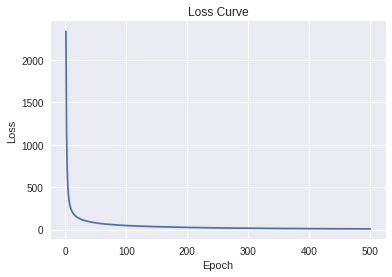

In [34]:
plt.plot(epochs, losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")

In [35]:
## Evaluate the Model

print("Accuracy:", accuracy_out)


Accuracy: 0.8883
